### Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_table('faithful.dat.txt', delim_whitespace=True,  \
    names=('Eruptions', 'Waiting'), skiprows = 26)

df

,Eruptions,Waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


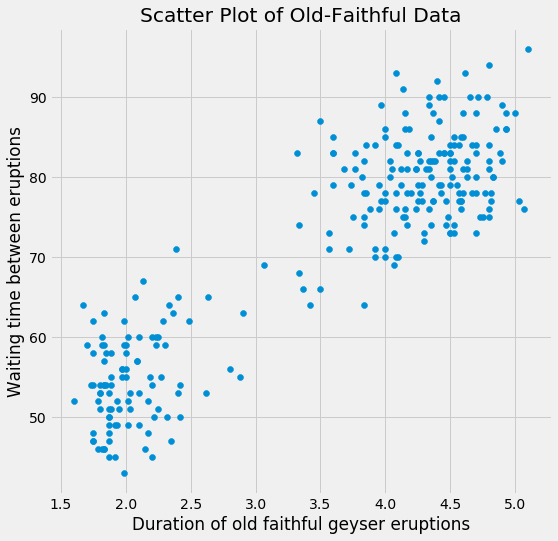

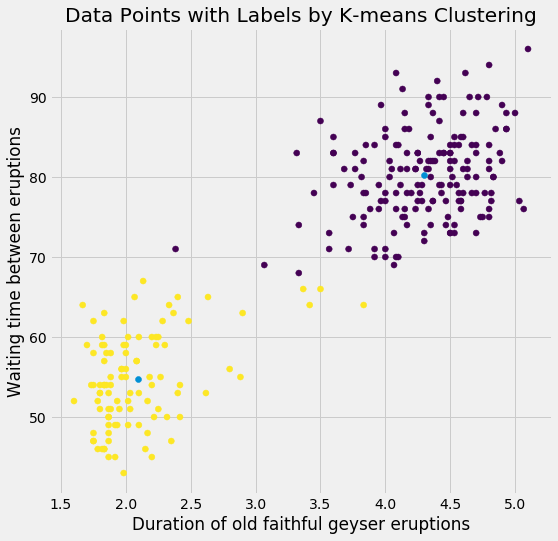

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))
eruptions = df.iloc[:,0].values
waiting = df.iloc[:,1].values
plt.scatter(eruptions, waiting)
plt.title("Scatter Plot of Old-Faithful Data")
plt.xlabel("Duration of old faithful geyser eruptions")
plt.ylabel("Waiting time between eruptions")
plt.show()

X = df.iloc[:,[0,1]].values #Cascade data points
np.random.shuffle(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.xlabel("Duration of old faithful geyser eruptions")
plt.ylabel("Waiting time between eruptions")
plt.title('Data Points with Labels by K-means Clustering')
plt.show()


In [4]:
# initialization
N = 272
w = np.array([0.5, 0.5])
u1 = np.array(kmeans.cluster_centers_[0])
u2 = np.array(kmeans.cluster_centers_[1])
cov1 = np.eye(2)          
cov2 = np.eye(2)
L_before = 0
gamma1 = np.empty(N)
gamma2 = np.empty(N)
gamma1_x_sum = np.empty(N)
gamma2_x_sum = np.empty(N)

for k in range(0,N):
    L_before += (np.log(w[0]*multivariate_normal.pdf(X[k], u1, cov1)) \
                +np.log(w[1]*multivariate_normal.pdf(X[k], u2, cov2) ) )

L_before = L_before / N
L_after = 0
iterations = 0
threshold = 1e-4

while np.abs(L_after - L_before) > threshold :
    
    iterations += 1
    L_before = L_after
    #for loop in range(0,5):   
    # E Step
    for i in range(0,N):
        gamma1[i] = (w[0]*multivariate_normal.pdf(X[i], u1, cov1)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))
        
        
        gamma2[i] = (w[1]*multivariate_normal.pdf(X[i], u2, cov2)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))

    # Now, M Step
    u1_num = 0
    u2_num = 0
    for j in range(0,N):
        u1_num = u1_num + gamma1[j]*X[j]
        u2_num = u2_num + gamma2[j]*X[j]
    
    u1 = u1_num / np.sum(gamma1)
    u2 = u2_num / np.sum(gamma2)
    
    cov1_num = np.zeros([2,2])
    cov2_num = np.zeros([2,2])
    
    for k in range(0,N):
        cov1_num = cov1_num + gamma1[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u1, (-1,1)) )*(X[k] - u1)
        cov2_num = cov2_num + gamma2[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u2, (-1,1)) )*(X[k] - u2)

    cov1 = cov1_num / np.sum(gamma1)
    cov2 = cov2_num / np.sum(gamma2)
    
    w[0] = np.sum(gamma1)/N
    w[1] = np.sum(gamma2)/N
    
    L_after = 0
    for l in range(0,N):
        L_after = L_after + (np.log(w[0]*multivariate_normal.pdf(X[l], u1, cov1)) \
            +np.log(w[1]*multivariate_normal.pdf(X[l], u2, cov2) ) )
    L_after = L_after / N
    
print("Number of Iterations: ", str(iterations))
print("Estimated mu1: ", str(u1))       
print("\n")
print("Estimated mu2: ", str(u2))   
print("\n")
print("Estimated w1: ", str(w[0]))       
print("\n")
print("Estimated w2: ", str(w[1])) 
print("\n")
print("Estimated sigma1:\n", str(cov1))       
print("\n")
print("Estimated sigma2:\n", str(cov2))  
   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Number of Iterations:  10
Estimated mu1:  [ 4.28966207 79.96811632]


Estimated mu2:  [ 2.03638856 54.47851745]


Estimated w1:  0.6441270990064238


Estimated w2:  0.35587290099357616


Estimated sigma1:
 [[ 0.16996832  0.94060779]
 [ 0.94060779 36.04619413]]


Estimated sigma2:
 [[ 0.06916776  0.43516851]
 [ 0.43516851 33.69728811]]


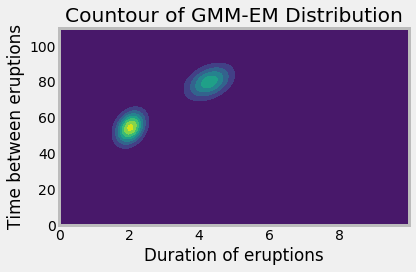

<Figure size 576x576 with 0 Axes>

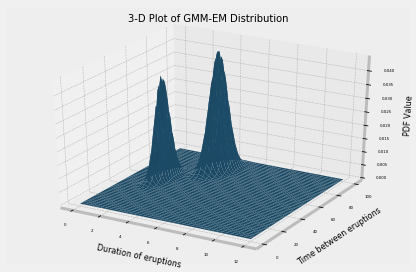

<Figure size 576x576 with 0 Axes>

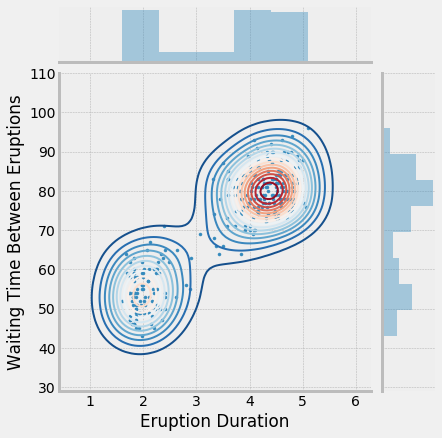

In [25]:
plt.style.use('bmh')
x, y = np.mgrid[0:10:.01, 0:110:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(u1, cov1)
rv2 = multivariate_normal(u2, cov2)
plt.contourf(x, y, rv2.pdf(pos)+rv1.pdf(pos))
#plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.xlabel("Duration of eruptions")
plt.ylabel("Time between eruptions")
plt.title('Countour of GMM-EM Distribution')
plt.tight_layout()
plt.figure(figsize=(8, 8))
plt.show()

x2, y2 = np.mgrid[0:12:120j, 0:100:10000j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x2.flat, y2.flat])

z = w[0]*multivariate_normal.pdf(xy, mean=u1, cov=cov1) + w[1]*multivariate_normal.pdf(xy, mean=u2, cov=cov2)
# Reshape back to the original grid.
z = z.reshape(x2.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2,y2,z)
# ax.plot_wireframe(x2,y2,z)
ax.set_xlabel("Duration of eruptions", fontsize = 8) 
ax.set_ylabel("Time between eruptions", fontsize = 8)
ax.set_zlabel("PDF Value", fontsize = 8)
plt.title('3-D Plot of GMM-EM Distribution', fontsize = 10)
ax.tick_params(axis='both', which='major', labelsize=4)
ax.tick_params(axis='both', which='minor', labelsize=4)
plt.tight_layout()
plt.figure(figsize=(8, 8))
plt.style.use('bmh')
plt.show()

f = (sns.jointplot(X[:,0], X[:,1], marker='.') \
     .plot_joint(sns.kdeplot, n_levels=20, cmap="RdBu_r")) \
    .set_axis_labels('Eruption Duration', 'Waiting Time Between Eruptions')



### Question 4 Analysis

- The first plot is the contour plot of the GMM-EM Model we generated using the EM algorithm.
- The second plot, is a 3D plot which plots the joint distribution and allows for better visualization. 
- The third plot is a contour plot but overlayed on the original data points. 
- The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data, or finding the centroid.
- We can use the means we calculate from EM to then split the dataset into clusters.